In [1]:
import math
import qiskit
import matplotlib
from qiskit import IBMQ, BasicAer
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.providers.ibmq import least_busy


## tomo spc ##
# Needed for functions
import numpy as np
import time
# Import Qiskit classes
from qiskit import Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
from qiskit.tools.visualization import plot_histogram



# backends :
# ibmqx4
# ibmqx2
# ibmq_16_melbourne
# ibmq_qasm_simulator


In [2]:
qiskit.IBMQ.load_accounts()

In [16]:
# Create the expected density matrix
q2 = QuantumRegister(2)
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])
print(bell)

job = qiskit.execute(bell, Aer.get_backend('statevector_simulator'))
psi_bell = job.result().get_statevector(bell)
print(psi_bell)

         ┌───┐     
q6_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q6_1: |0>─────┤ X ├
              └───┘
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [31]:
# Density matrix W4
q4 = QuantumRegister(4)
w4 = QuantumCircuit(q4)
w4.x(q4[1])
Balt(w4, q4, 2, 1, 0.5)
Balt(w4, q4, 0, 1, 0.5)
Balt(w4, q4, 3, 2, 0.5)
print(w4)

job = qiskit.execute(w4, Aer.get_backend('statevector_simulator'))
psi_w4 = job.result().get_statevector(w4)
print(psi_w4)

          ┌─────────────────┐                                      ┌───┐»
q12_0: |0>┤ U3(-0.7854,0,0) ├──────────────────────────────────────┤ X ├»
          └──────┬───┬──────┘           ┌───┐                 ┌───┐└─┬─┘»
q12_1: |0>───────┤ X ├─────────■────────┤ H ├──────────────■──┤ H ├──■──»
          ┌──────┴───┴──────┐┌─┴─┐┌─────┴───┴──────┐┌───┐┌─┴─┐├───┤     »
q12_2: |0>┤ U3(-0.7854,0,0) ├┤ X ├┤ U3(0.7854,0,0) ├┤ H ├┤ X ├┤ H ├──■──»
          ├─────────────────┤└───┘└────────────────┘└───┘└───┘└───┘┌─┴─┐»
q12_3: |0>┤ U3(-0.7854,0,0) ├──────────────────────────────────────┤ X ├»
          └─────────────────┘                                      └───┘»
«       ┌────────────────┐┌───┐┌───┐┌───┐
«q12_0: ┤ U3(0.7854,0,0) ├┤ H ├┤ X ├┤ H ├
«       └─────┬───┬──────┘└───┘└─┬─┘├───┤
«q12_1: ──────┤ H ├──────────────■──┤ H ├
«             ├───┤                 ├───┤
«q12_2: ──────┤ H ├──────────────■──┤ H ├
«       ┌─────┴───┴──────┐┌───┐┌─┴─┐├───┤
«q12_3: ┤ U3(0.7854,0,0) ├┤ H ├┤ X ├┤ H 

In [32]:
# Create the actual circuit 
q2 = QuantumRegister(6)
bell = QuantumCircuit(q2)
bell.h(q2[3])
bell.cx(q2[3], q2[5])
print(bell)

                    
q13_0: |0>──────────
                    
q13_1: |0>──────────
                    
q13_2: |0>──────────
          ┌───┐     
q13_3: |0>┤ H ├──■──
          └───┘  │  
q13_4: |0>───────┼──
               ┌─┴─┐
q13_5: |0>─────┤ X ├
               └───┘


In [33]:
q14 = QuantumRegister(14)
w4_real = QuantumCircuit(q14)
w4_real.x(q14[5])

Balt(w4_real, q14, 9, 5, 0.5)
Balt(w4_real, q14, 6, 5, 0.5)
Balt(w4_real, q14, 10, 9, 0.5)

In [34]:
# Prepare device noise simulation (DNS)

properties = melbourne.properties()
coupling_map = melbourne.configuration().coupling_map
gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

# Construct the noise model from backend properties and custom gate times
noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)

# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

print("noise model prepared for", melbourne)

noise model prepared for ibmq_16_melbourne


In [35]:


# Generate circuits and run on simulator
t = time.time()
# Generate the state tomography circuits. Only pass in the 
# registers we want to measure (in this case 3 and 5)
qst_bell = state_tomography_circuits(bell, [q2[3],q2[5]])
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Generate the state tomography circuits using the default settings for 
# basis

tomo_bell = StateTomographyFitter(job.result(), qst_bell)



Time taken: 0.14710664749145508


In [36]:
t = time.time()

qst_w4 = state_tomography_circuits(w4_real, [q14[6], q14[5], q14[9], q14[10]])
job = qiskit.execute(qst_w4, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time : ', time.time() - t)

tomo_w4 = StateTomographyFitter(job.result(), qst_w4)

Time :  1.5202326774597168


In [37]:
# Perform the tomography fit
# which outputs a density matrix
rho_bell = tomo_bell.fit()
F_bell = state_fidelity(psi_bell, rho_bell)
print('Fit Fidelity =', F_bell)

Fit Fidelity = 0.9967874060690004


In [38]:
rho_w4 = tomo_w4.fit()
F_w4 = state_fidelity(psi_w4, rho_w4)
print('Fit Fidelity =', F_w4)

Fit Fidelity = 0.9938314146451415


In [25]:
# get different backends
simulator = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=True))
least_busy = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))
melbourne = IBMQ.get_backend('ibmq_16_melbourne')

print("least busy:",least_busy.name())

least busy: ibmqx2


In [26]:
# helpers

# initialize circuit with n registers
def init(n):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q, c)
    return q, c, qc

# initialize circuit with n classical register and 14 quantum registers
def init14(n):
    q = QuantumRegister(14)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q, c)
    return q, c, qc

# controlled G(p) gate
def CG(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    theta = p2theta(p)
    circuit.u3(theta / 2, 0, 0, qregister[qbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.u3(-theta / 2, 0, 0, qregister[qbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    return

# alternative design of controlled G(p)
def CGalt(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    thetap = t2tp(p2theta(p))
    circuit.u3(-thetap, 0, 0, qregister[qbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.u3(thetap, 0, 0, qregister[qbit])

# B(p) block. Controlled G(p) followed by inverted CNOT
def B(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    CG(circuit, qregister, qbit, ctrlbit, p)
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])

# B(p) using alternative design of CG(p) gate
def Balt(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    CGalt(circuit, qregister, qbit, ctrlbit, p)
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])

# get theta angle from p for the U3 rotation inside CG(p)
def p2theta(p: float):
    return math.acos(math.sqrt(p)) * 2

# get theta' angle from theta for the U3 rotation inside CGalt(p)
def t2tp(theta:float):
    return math.asin(math.cos(theta / 2))

# run circuit on Melbourne device
def run(circuit, shots: int =1024):
    job = qiskit.execute(circuit , melbourne, shots=shots)
    print( job.result().get_counts() )

# run circuit on least busy device
def runFast(circuit, shots: int =1024):
    job = qiskit.execute(circuit , least_busy, shots=shots)
    print( job.result().get_counts() )

# run circuit on QASM simulator
def simulate(circuit, shots: int =1024):
    job = qiskit.execute(circuit , backend=simulator, shots=shots)
    print( job.result().get_counts() )

In [48]:
# naive W2 state
theta = p2theta(0.5)

q, c, qc = init(2)
qc.x(q[0])

B(qc, q, 1, 0, 0.5)

qc.measure(q, c)
qc.draw()

In [49]:
simulate(qc)
runFast(qc)

{'10': 513, '01': 511}
{'11': 163, '00': 256, '10': 296, '01': 309}


In [50]:
# W2 state
theta = p2theta(0.5)

q, c, qc = init(2)
qc.x(q[0])

CG(qc, q, 1, 0, 0.5)
qc.h(q)
qc.cx(q[0], q[1])
qc.h(q)

qc.measure(q, c)
qc.draw()

In [51]:
run(qc, shots = 8192)

{'11': 226, '00': 930, '10': 3373, '01': 3663}


         ┌───┐
q5_0: |0>┤ X ├
         └───┘
q5_1: |0>─────
              


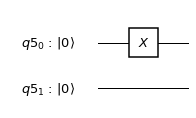

In [22]:
qreg = QuantumRegister(2)
w4 = QuantumCircuit(qreg)
w4.x(qreg[0])
tomo = state_tomography_circuits(w4, qreg)
print(w4)
w4.draw(output='mpl')

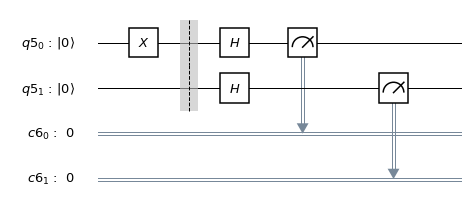

In [23]:

tomo[0].draw(output='mpl')

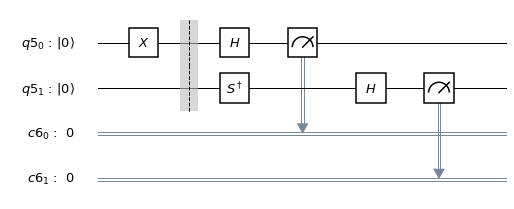

In [24]:
tomo[1].draw(output='mpl')

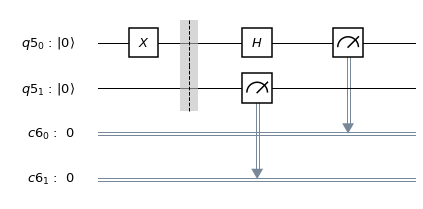

In [25]:

tomo[2].draw(output='mpl')

In [26]:
calib_circuit, state_labels = mc.complete_meas_cal(qr=qreg)
for foo in calib_circuit:
    print(foo)

         ┌─┐   
q5_0: |0>┤M├───
         └╥┘┌─┐
q5_1: |0>─╫─┤M├
          ║ └╥┘
 c7_0: 0 ═╩══╬═
             ║ 
 c7_1: 0 ════╩═
               
         ┌───┐┌─┐
q5_0: |0>┤ X ├┤M├
         └┬─┬┘└╥┘
q5_1: |0>─┤M├──╫─
          └╥┘  ║ 
 c7_0: 0 ══╬═══╩═
           ║     
 c7_1: 0 ══╩═════
                 
         ┌─┐        
q5_0: |0>┤M├────────
         └╥┘┌───┐┌─┐
q5_1: |0>─╫─┤ X ├┤M├
          ║ └───┘└╥┘
 c7_0: 0 ═╩═══════╬═
                  ║ 
 c7_1: 0 ═════════╩═
                    
         ┌───┐┌─┐   
q5_0: |0>┤ X ├┤M├───
         ├───┤└╥┘┌─┐
q5_1: |0>┤ X ├─╫─┤M├
         └───┘ ║ └╥┘
 c7_0: 0 ══════╩══╬═
                  ║ 
 c7_1: 0 ═════════╩═
                    
